In [1]:
import requests
import pandas as pd

In [2]:
city = 'dhaka'

In [3]:
df = pd.read_csv('geo_sampling/{0:s}-roads-s1k.csv'.format(city))
#df = df.sample(10)

In [4]:
API_KEY = 'GOOGLE_MAPS_API_KEY'

## Get Google Maps Street View metadata

In [5]:
def gsv_metadata(lat, lon):
    data = {'key': API_KEY,
                'location':  '{0:f},{1:f}'.format(lat, lon)}
    r = requests.get('https://maps.googleapis.com/maps/api/streetview/metadata', params=data)
    if r.status_code == 200:
        return r.json()
    else:
        print("WARN: No metadata for {0:f},{1:f}".format(lat, lon))
        return None

In [6]:
df['gsv_metadata'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_metadata(r.start_lat, r.start_long), axis=1)

In [7]:
mdf = pd.concat([df, df.gsv_metadata.apply(pd.Series)], axis=1)

In [8]:
mdf[['osm_type', 'start_lat', 'start_long', 'date', 'status', 'pano_id', 'copyright']]

osm_type  start_lat  start_long     date        status  \
0     tertiary  23.931237   90.308130  2013-06            OK   
1        trunk  24.021167   90.243935  2015-05            OK   
2    secondary  23.764165   90.370867  2013-06            OK   
3        trunk  23.703838   90.525720  2013-04            OK   
4    secondary  23.932825   90.462825      NaN  ZERO_RESULTS   
5    secondary  24.097213   90.402141  2015-12            OK   
6        trunk  23.529859   90.695072  2013-04            OK   
7      primary  23.729986   90.406527  2013-03            OK   
8    secondary  23.793575   90.410013  2013-06            OK   
9     tertiary  23.794908   90.414243  2013-02            OK   
10     primary  23.809020   90.421494  2013-02            OK   
11       trunk  23.742639   90.530935  2015-08            OK   
12   secondary  23.802786   90.370524  2013-03            OK   
13    tertiary  23.809408   90.367989  2013-02            OK   
14   secondary  23.745169   90.404181  2013-04            OK   
15     primary  23.897315   90.379809  2013-06            OK   
16       trunk  23.605489   90.614189  2013-04            OK   
17     primary  23.809527   90.421419  2013-02            OK   
18    tertiary  23.745824   90.402150  2013-03            OK   
19    tertiary  23.553643   90.329212      NaN  ZERO_RESULTS   
20       trunk  23.813652   89.811615  2013-09            OK   
21   secondary  23.009219   89.828977  2013-11            OK   
22   secondary  24.139733   90.541142      NaN  ZERO_RESULTS   
23   secondary  24.099879   90.586447      NaN  ZERO_RESULTS   
24   secondary  24.045603   90.642553      NaN  ZERO_RESULTS   
25    tertiary  23.522890   90.694804      NaN  ZERO_RESULTS   
26    tertiary  23.895861   90.408339      NaN  ZERO_RESULTS   
27     primary  23.930055   90.452693      NaN  ZERO_RESULTS   
28   secondary  23.992564   90.401739      NaN  ZERO_RESULTS   
29   secondary  23.935911   90.509063      NaN  ZERO_RESULTS   
..         ...        ...         ...      ...           ...   
970   tertiary  25.207559   89.994205      NaN  ZERO_RESULTS   
971   tertiary  25.214714   89.978847      NaN  ZERO_RESULTS   
972   tertiary  23.802687   90.362050  2013-03            OK   
973    primary  23.741855   90.397783  2013-04            OK   
974  secondary  23.744150   90.414426  2013-03            OK   
975  secondary  23.965145   90.416350      NaN  ZERO_RESULTS   
976  secondary  23.969318   90.428333      NaN  ZERO_RESULTS   
977  secondary  24.001016   90.418747  2017-07            OK   
978   tertiary  24.274284   91.107884      NaN  ZERO_RESULTS   
979   tertiary  24.277183   91.129971      NaN  ZERO_RESULTS   
980    primary  24.283196   91.119477      NaN  ZERO_RESULTS   
981      trunk  23.663046   90.388733  2016-01            OK   
982      trunk  23.668102   90.396556  2016-01            OK   
983  secondary  23.816921   90.407004  2013-06            OK   
984  secondary  23.742738   90.396083  2013-03            OK   
985  secondary  23.536783   90.456043      NaN  ZERO_RESULTS   
986  secondary  23.399883   90.202351      NaN  ZERO_RESULTS   
987  secondary  23.397807   90.230552      NaN  ZERO_RESULTS   
988   tertiary  24.276496   91.098176      NaN  ZERO_RESULTS   
989    primary  24.304080   91.011584      NaN  ZERO_RESULTS   
990    primary  24.280494   91.093113      NaN  ZERO_RESULTS   
991   tertiary  23.794831   90.414122  2013-02            OK   
992    primary  23.727810   90.410560  2013-04            OK   
993    primary  23.765055   90.384377  2013-06            OK   
994  secondary  23.746347   90.472316  2013-04            OK   
995  secondary  23.740290   90.479576  2013-04            OK   
996    primary  23.753076   90.401152  2013-03            OK   
997    primary  23.753037   90.401076  2013-03            OK   
998  secondary  24.028817   89.859756      NaN  ZERO_RESULTS   
999  secondary  24.045305   89.866212      NaN  ZERO_RESULTS   

                                     

In [9]:
mdf.groupby('date').agg({'status': 'count'})

status
date           
2013-02      12
2013-03      26
2013-04      26
2013-05      12
2013-06      15
2013-09      22
2013-10       1
2013-11      25
2015-05      13
2015-08      19
2015-11       3
2015-12      58
2016-01       8
2016-09       1
2017-03       1
2017-05       1
2017-06       1
2017-07       2

In [10]:
mdf[mdf.status != 'OK']

segment_id     osm_id                     osm_name   osm_type  start_lat  \
4           196   24225288       Tongi-Kaliganj Highway  secondary  23.932825   
19          476   25639335                   K. C. Road   tertiary  23.553643   
22          540   29035233                          NaN  secondary  24.139733   
23          554   29035233                          NaN  secondary  24.099879   
24          572   29035233                          NaN  secondary  24.045603   
25          616   31153154                          NaN   tertiary  23.522890   
26          619   31154342                          NaN   tertiary  23.895861   
27          621   31154595            Dhaka City Bypass    primary  23.930055   
28          633   31159105                          NaN  secondary  23.992564   
29          647   31159479                          NaN  secondary  23.935911   
33          699   31166213                          NaN   tertiary  23.767357   
35          716   31384029                          NaN   tertiary  23.896043   
46          857   33891557    Zinzira - Ramerkanda Road   tertiary  23.701279   
51          966   34958463      Rajbari - Baliakandi Rd  secondary  23.675094   
54          991   48492906                          NaN   tertiary  23.983228   
55         1054   49671470                          NaN  secondary  23.941001   
56         1067   49671470                          NaN  secondary  23.992010   
57         1077   49674094   Ghorashal - Panchdona Road  secondary  23.929396   
58         1082   49674094   Ghorashal - Panchdona Road  secondary  23.914219   
59         1084   49674094   Ghorashal - Panchdona Road  secondary  23.908212   
60         1119   57767864                          NaN   tertiary  23.615287   
62         1143   60510546  Vedorgonj - Shariatpur Road    primary  23.166557   
63         1147   60510546  Vedorgonj - Shariatpur Road    primary  23.173972   
64         1161   60510546  Vedorgonj - Shariatpur Road    primary  23.192072   
67         1202   60510548                          NaN    primary  23.215533   
74         1398   60515857                          NaN   tertiary  22.979964   
75         1415   60515858                          NaN  secondary  22.846481   
76         1420   60515858                          NaN  secondary  22.827614   
78         1480   60516057                          NaN   tertiary  23.154890   
79         1488   60516058                          NaN   tertiary  23.046779   
..          ...        ...                          ...        ...        ...   
955       16391  450636681                          NaN  secondary  25.016406   
956       16399  451824059                          NaN   tertiary  23.411610   
957       16407  451824989                          NaN   tertiary  23.386221   
958       16415  451833094                          NaN   tertiary  23.346642   
959       16445  454538009  Vedorgonj - Shariatpur Road    primary  23.196859   
960       16451  454538009  Vedorgonj - Shariatpur Road    primary  23.181327   
961       16453  454538009  Vedorgonj - Shariatpur Road    primary  23.172688   
962       16460  454557342                          NaN   tertiary  23.097328   
963       16463  454557343                          NaN   tertiary  23.101042   
964       16526  466131052   Tarakandi Sarishabari Road  secondary  24.715714   
965       16541  469613482                          NaN  secondary  23.791213   
966       16545  470234859                          NaN   tertiary  24.563022   
967       16557  470873429                          NaN  secondary  24.139291   
968       16609  474169356                          NaN   tertiary  25.186497   
969       16613  474169356                          NaN   tertiary  25.192338   
970       16624  474169356                          NaN   tertiary  25.207559   
971       16628  474169361                          NaN   tertiary  25.214714   
975       16668  481580310          

In [12]:
df = mdf[mdf.status == 'OK'].copy()

## Get Google Maps Street View Image

In [13]:
from base64 import b64encode, b64decode

def gsv_image(lat, lon, heading=0, pitch=0, size='640x640'):
    data = {'key': API_KEY,
                'location':  '{0:f},{1:f}'.format(lat, lon),
                'heading': '{0:d}'.format(heading),
                'pitch': '{0:d}'.format(pitch),
                'size': size}
    r = requests.get('https://maps.googleapis.com/maps/api/streetview', params=data)
    if r.status_code == 200:
        return b64encode(r.content)
    else:
        print(r.status_code)
        print(r.text)
        print("WARN: No image data for {0:f},{1:f}".format(lat, lon))
        return None

In [14]:
df['img0'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 0, -15), axis=1)
df['img90'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 90, -15), axis=1)
df['img180'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 180, -15), axis=1)
df['img270'] = df[['start_lat', 'start_long']].apply(lambda r: gsv_image(r.start_lat, r.start_long, 270, -15), axis=1)

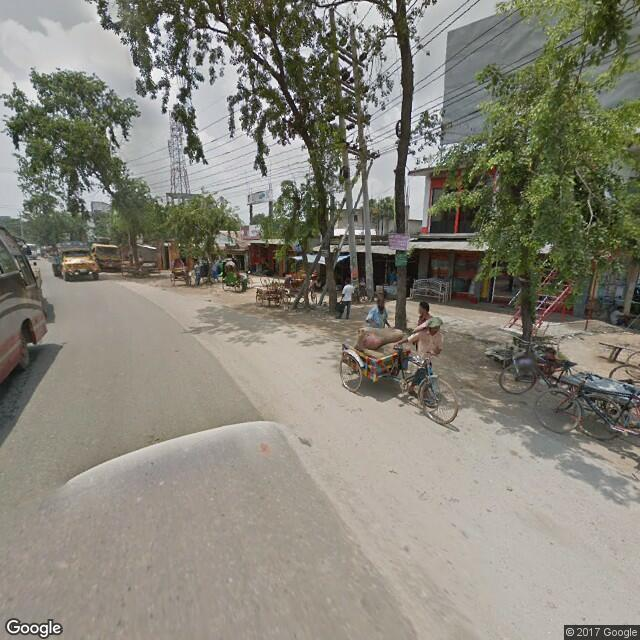

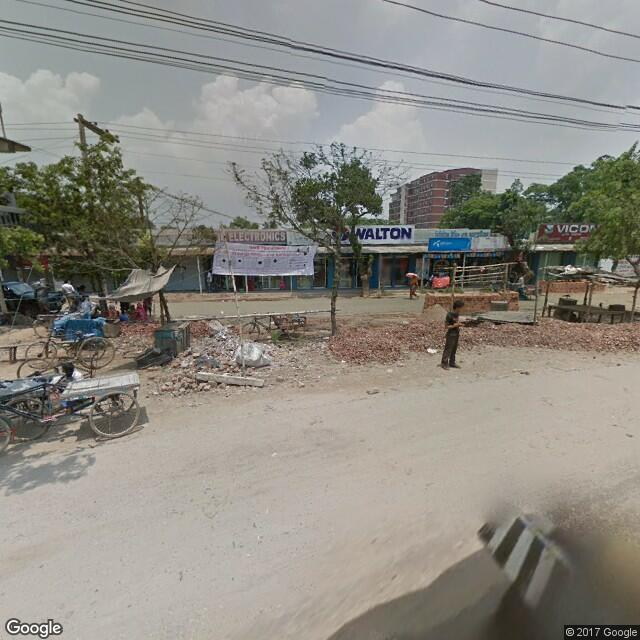

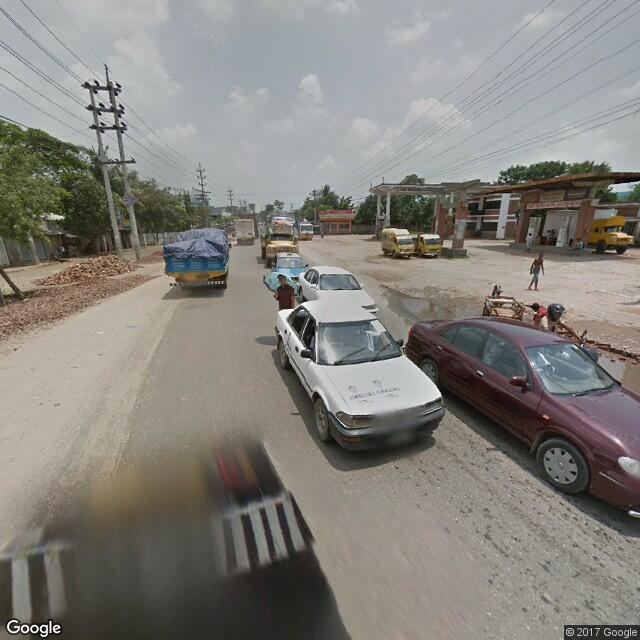

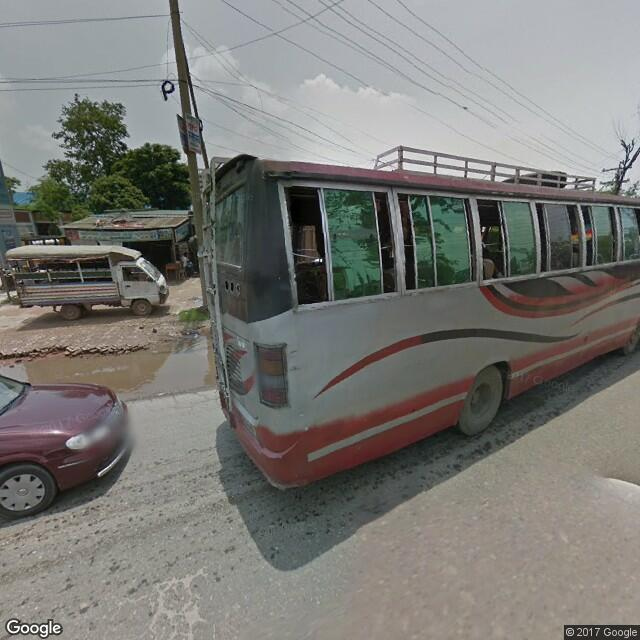

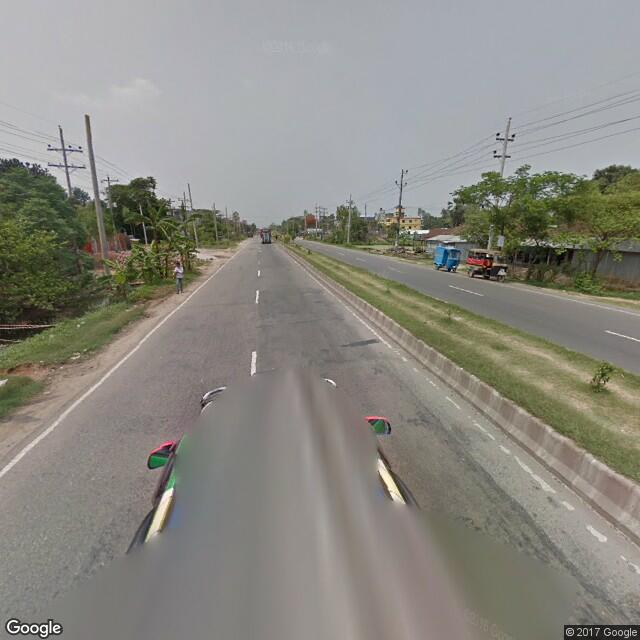

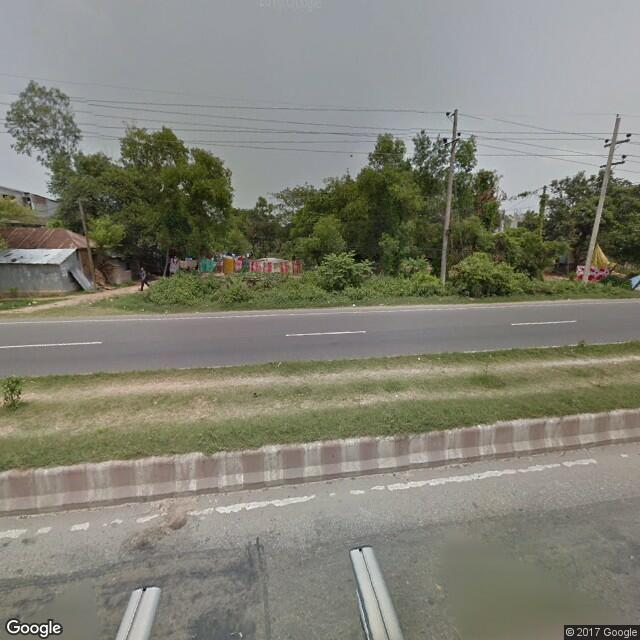

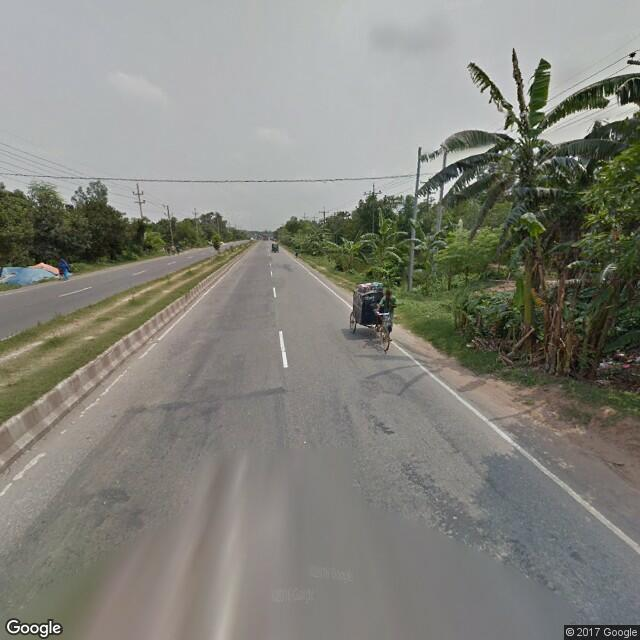

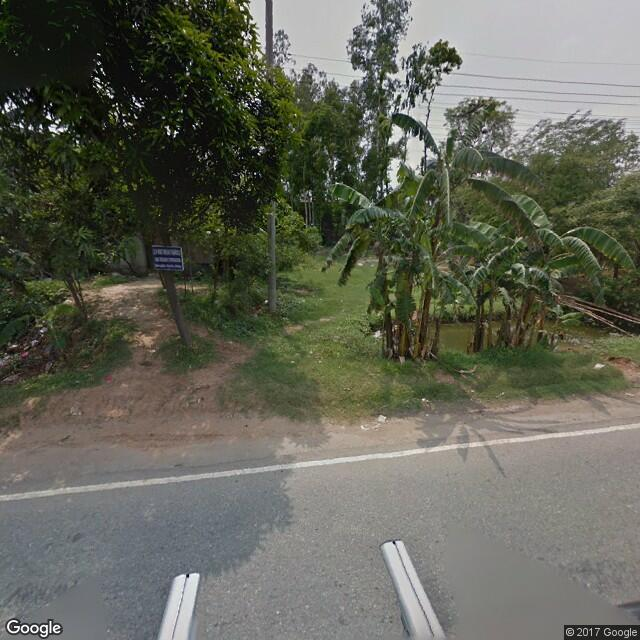

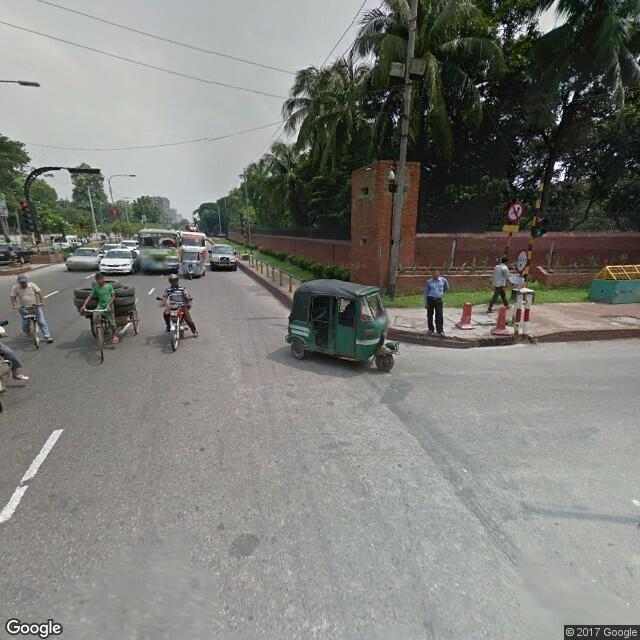

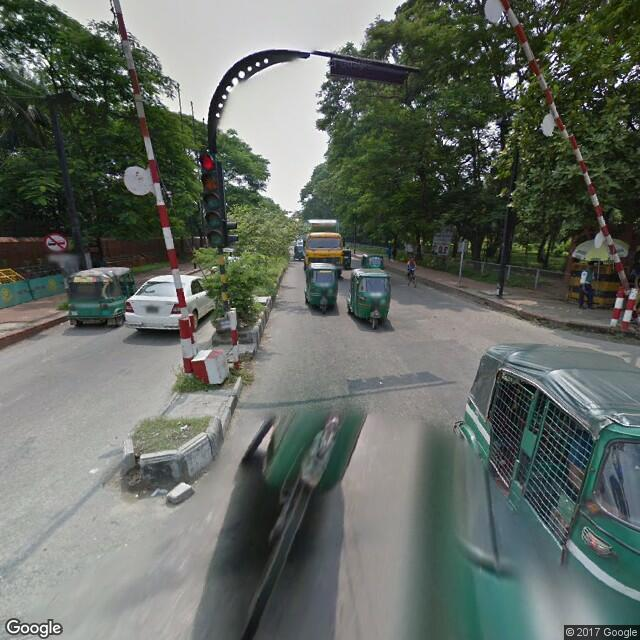

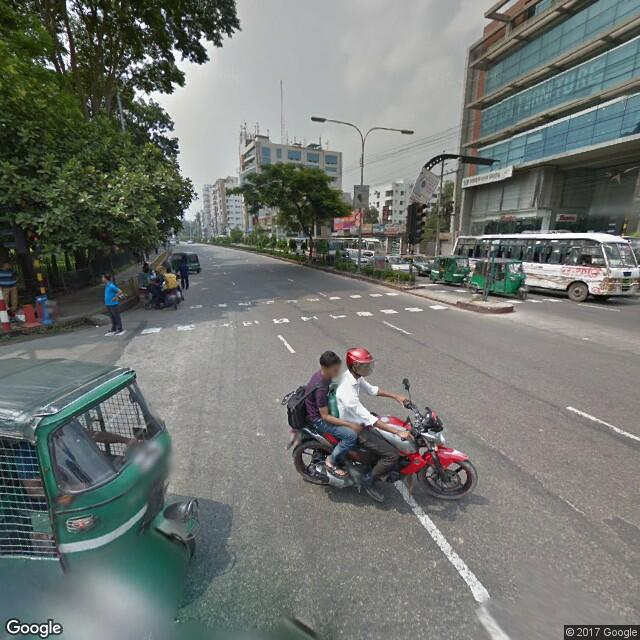

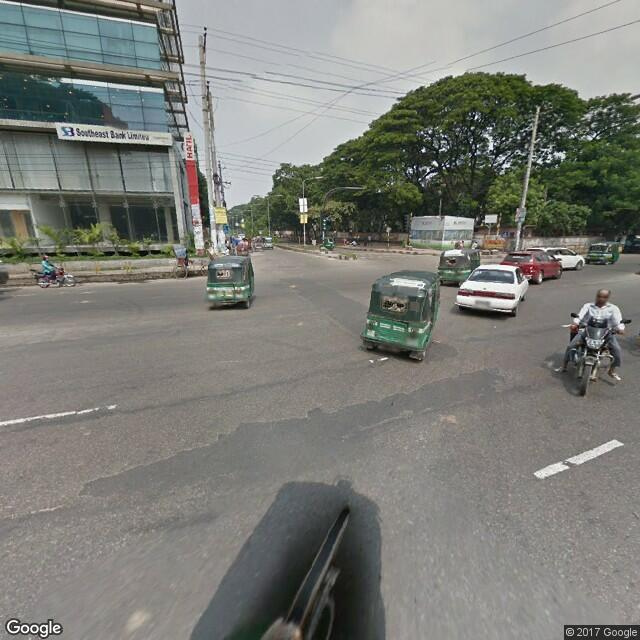

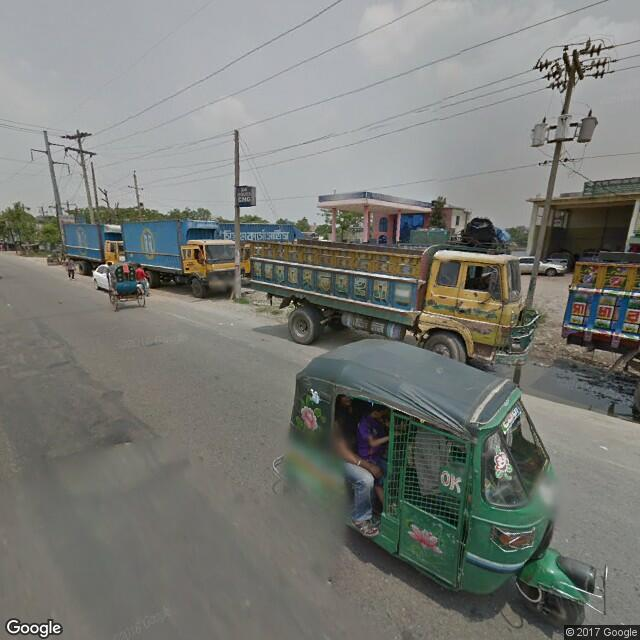

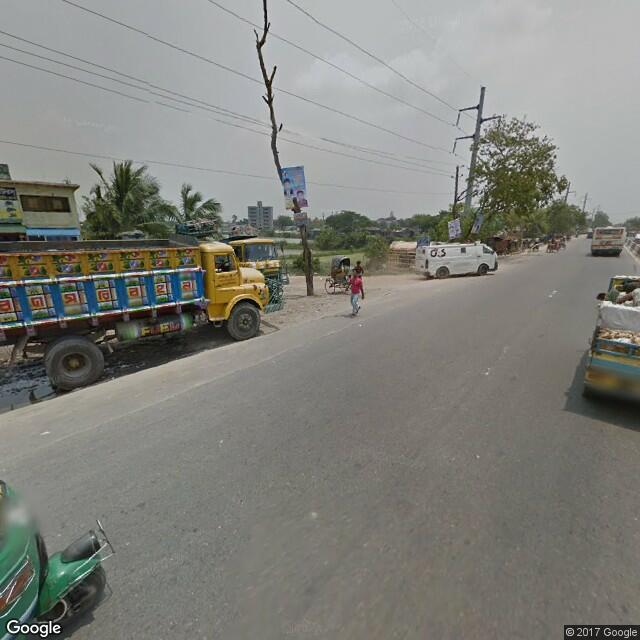

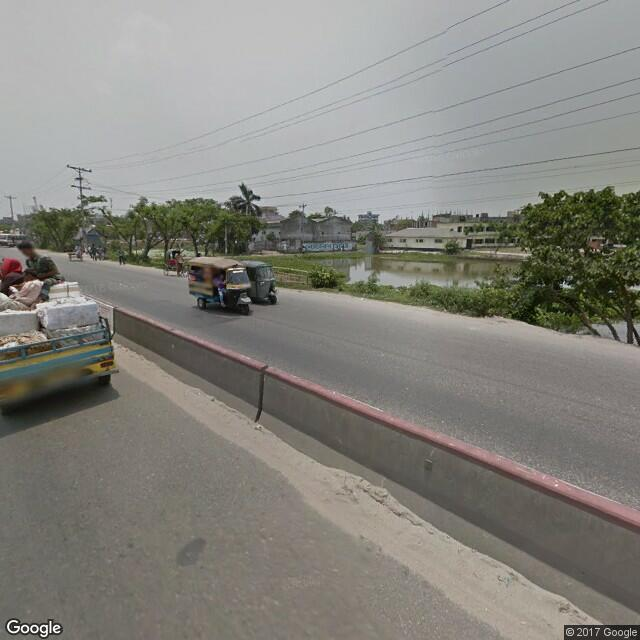

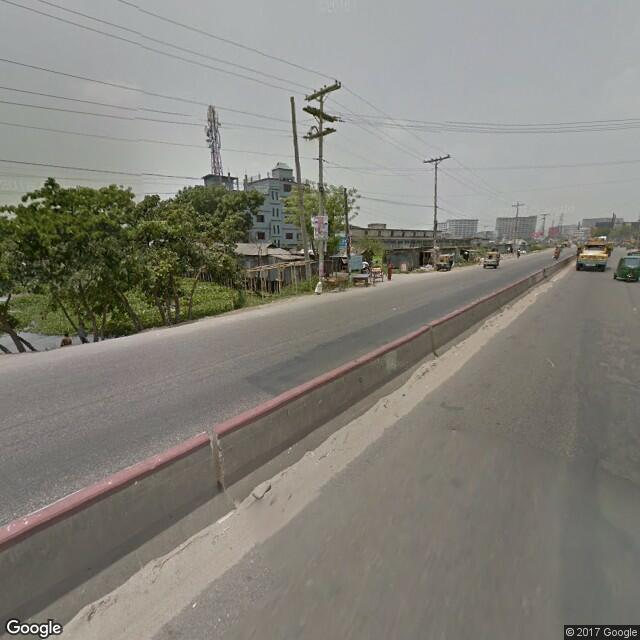

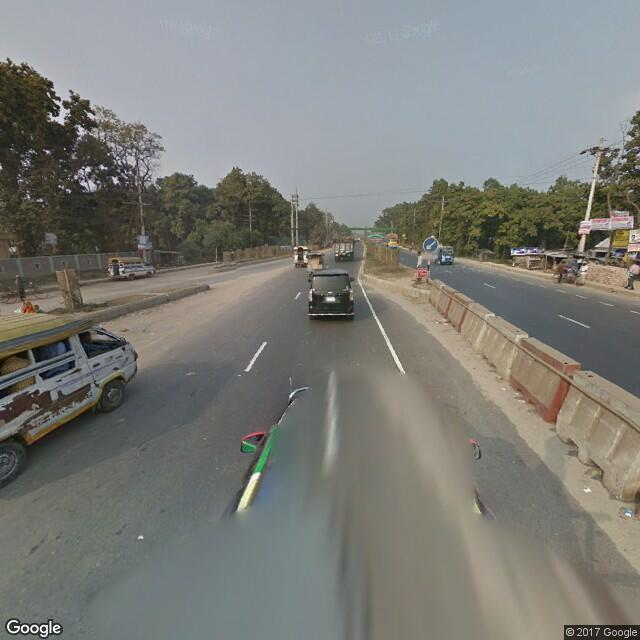

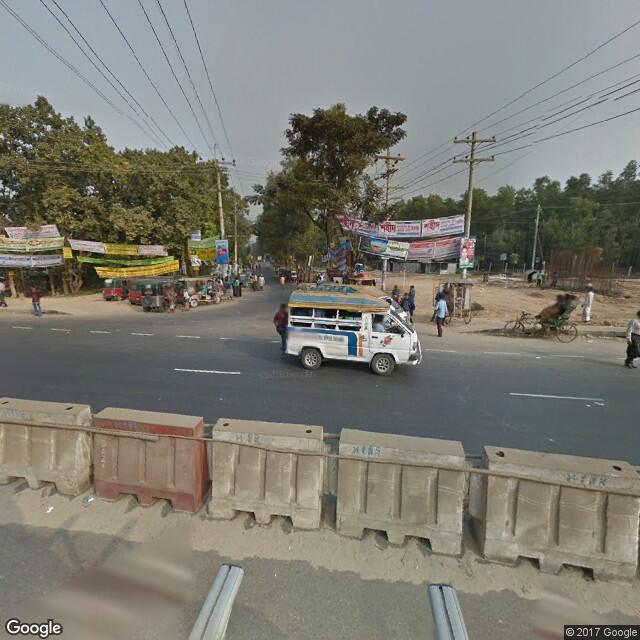

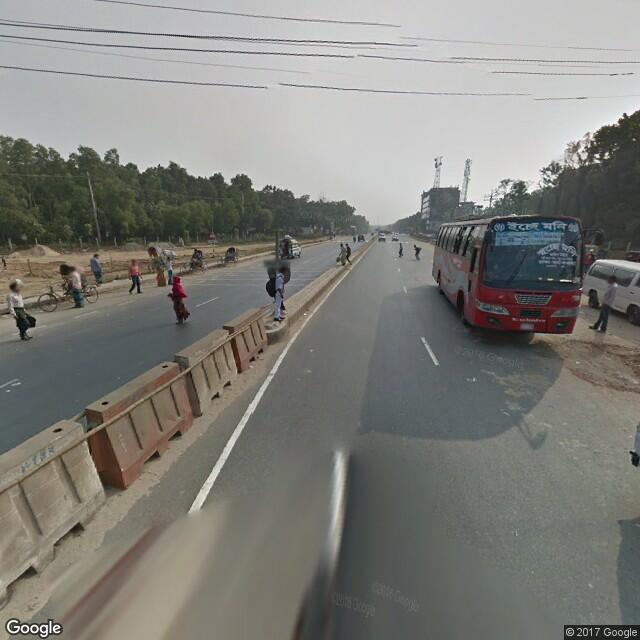

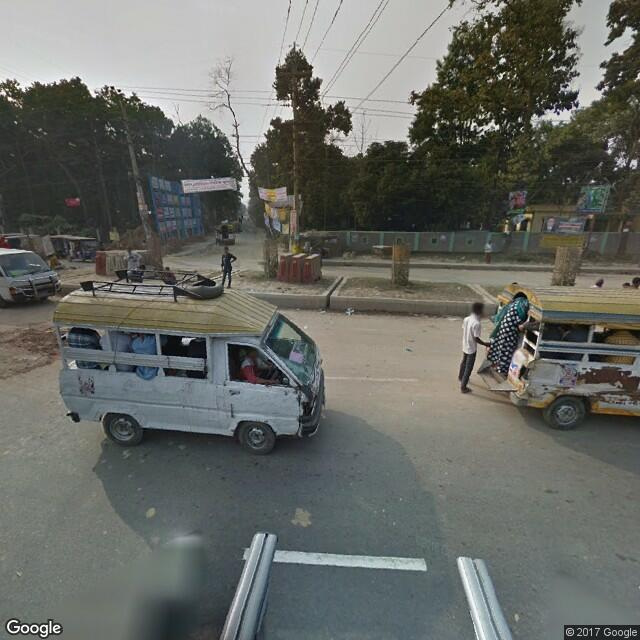

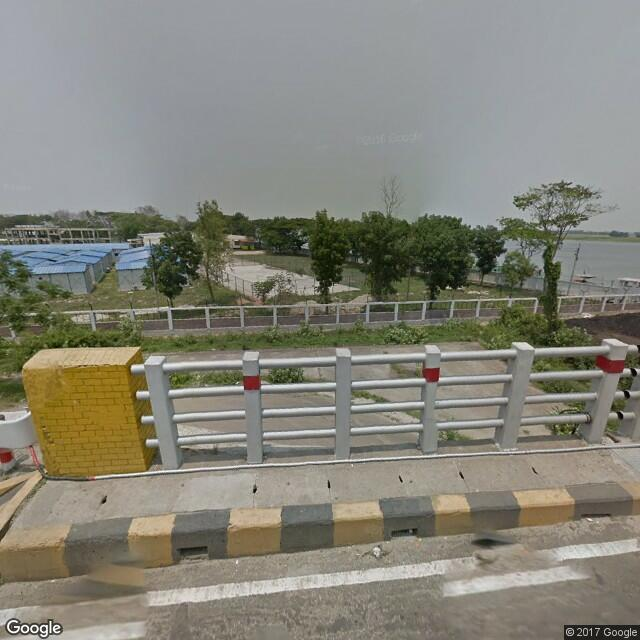

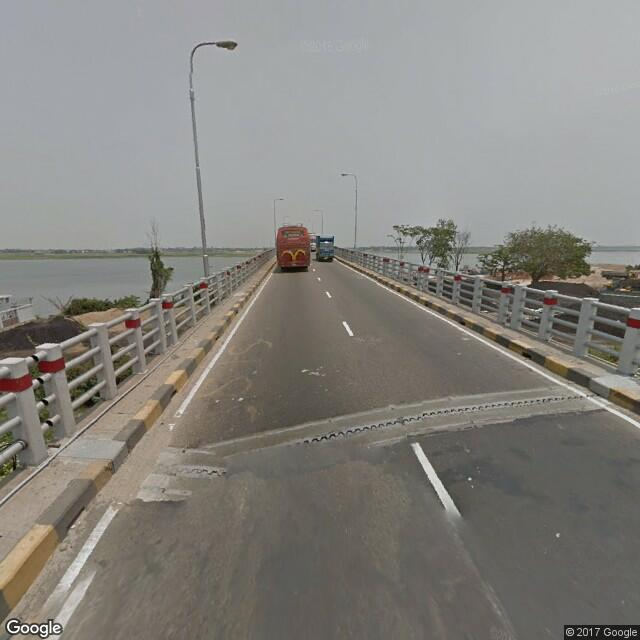

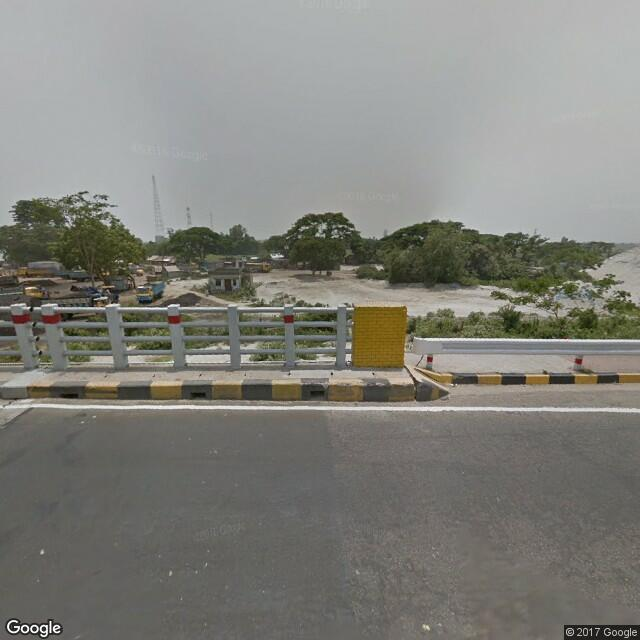

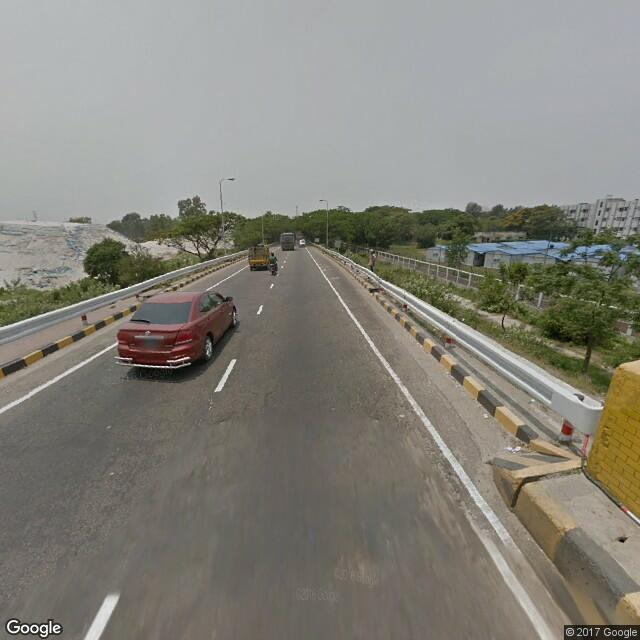

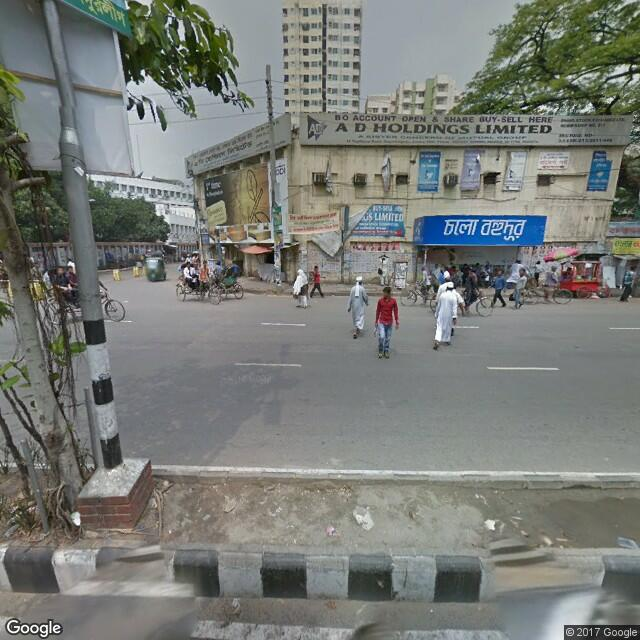

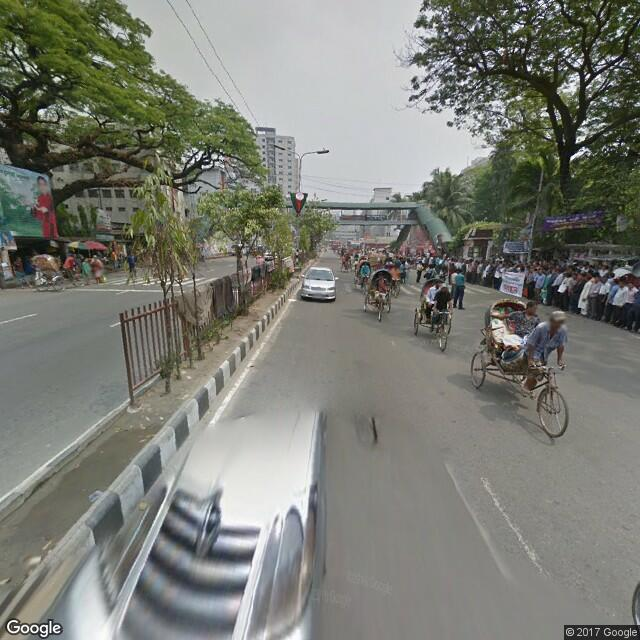

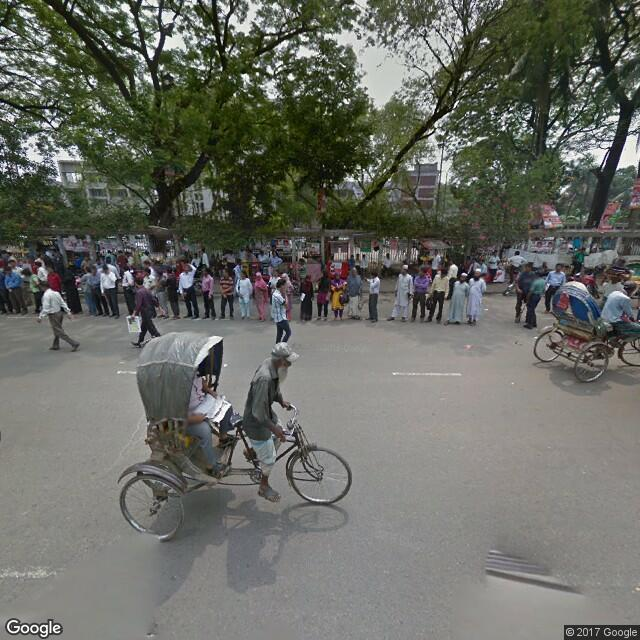

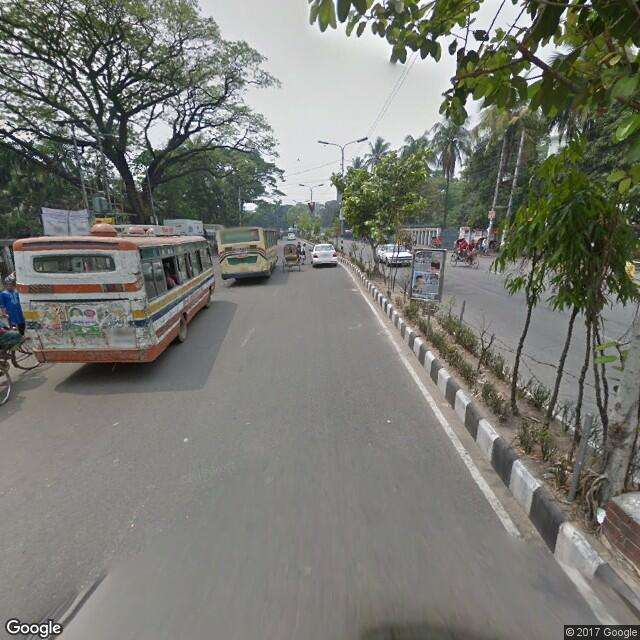

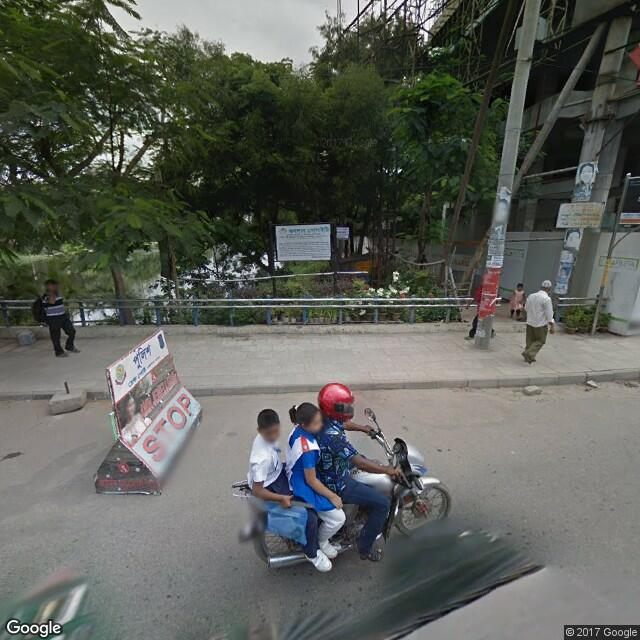

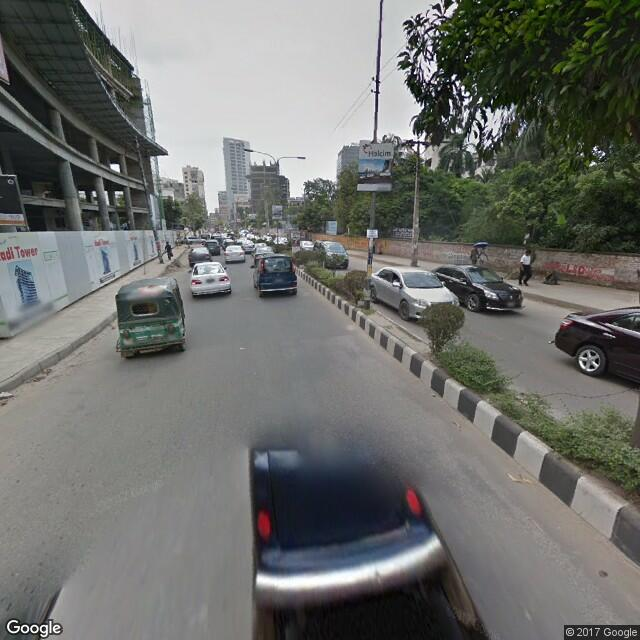

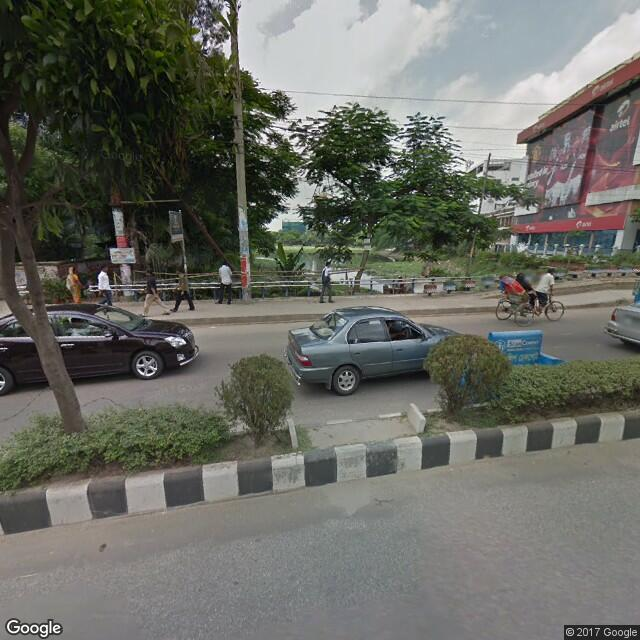

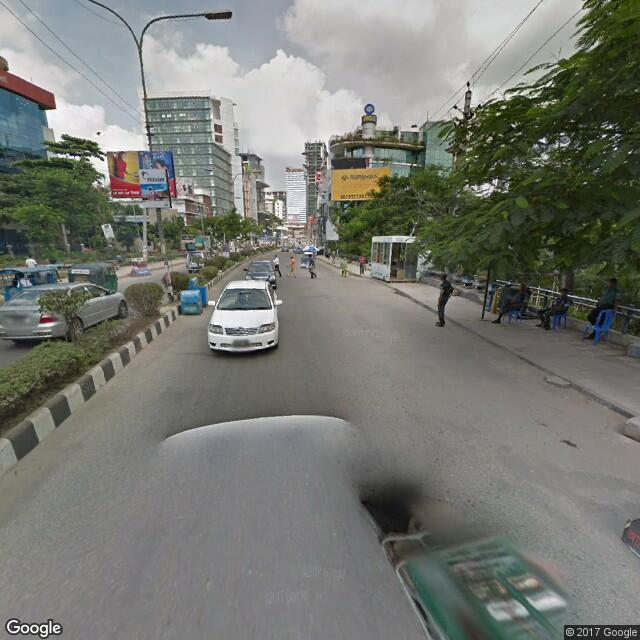

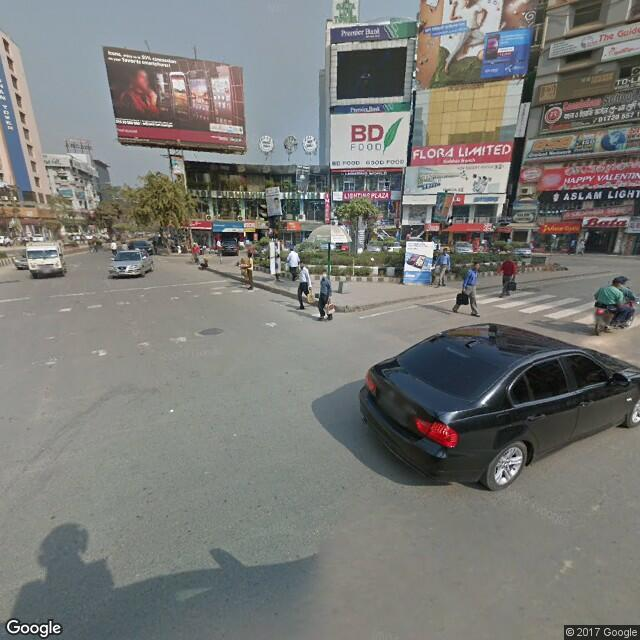

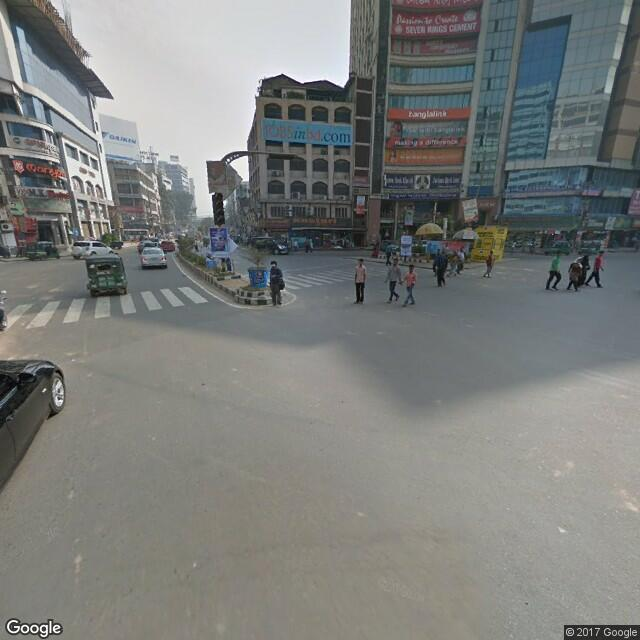

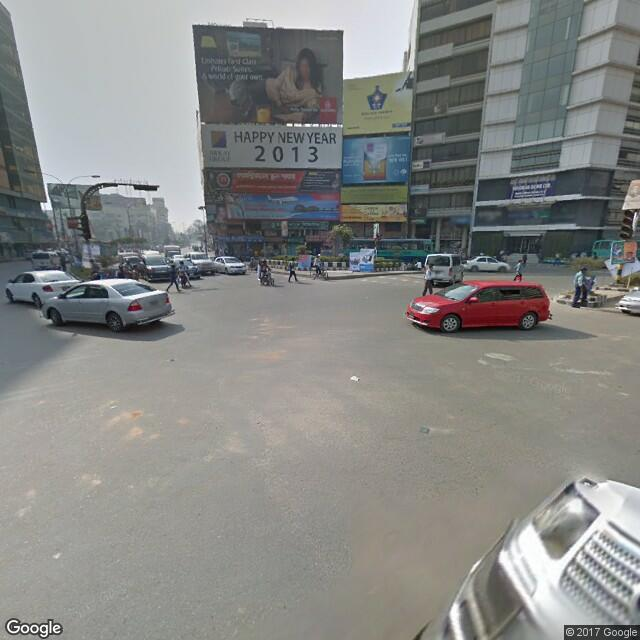

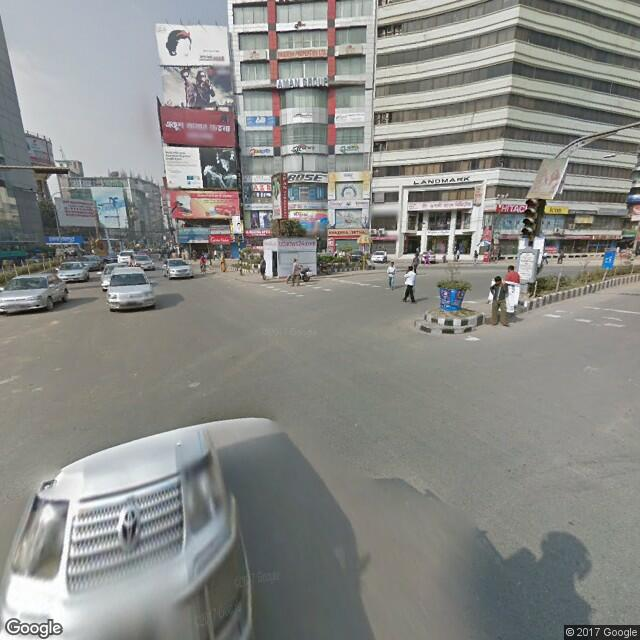

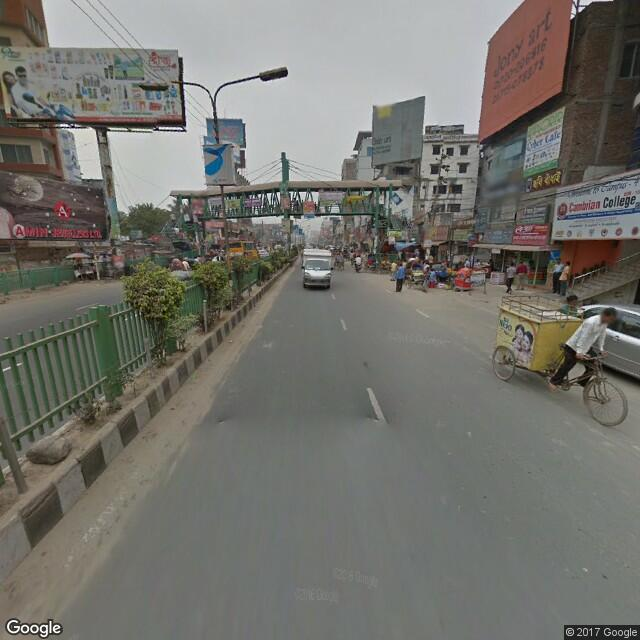

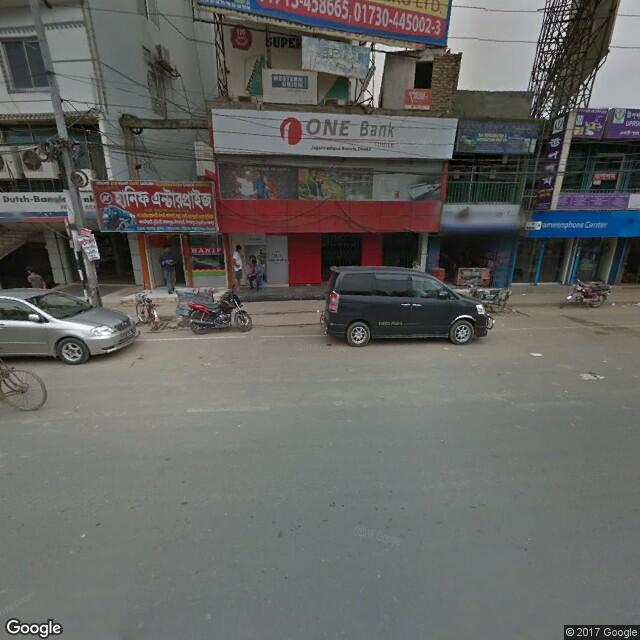

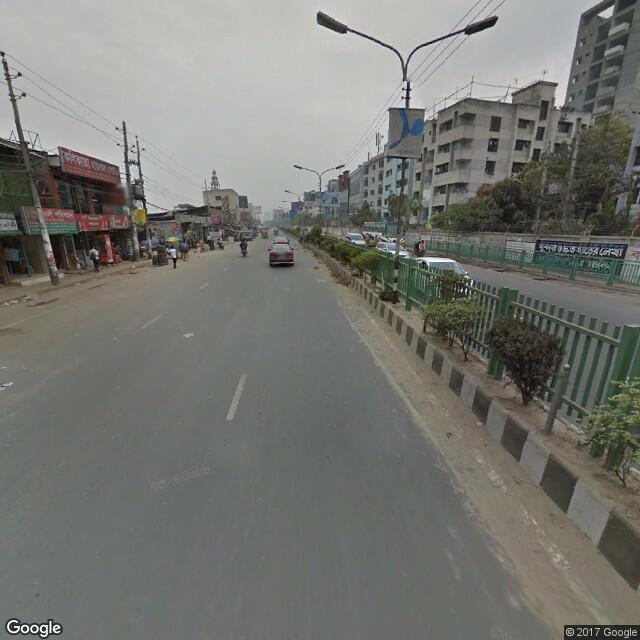

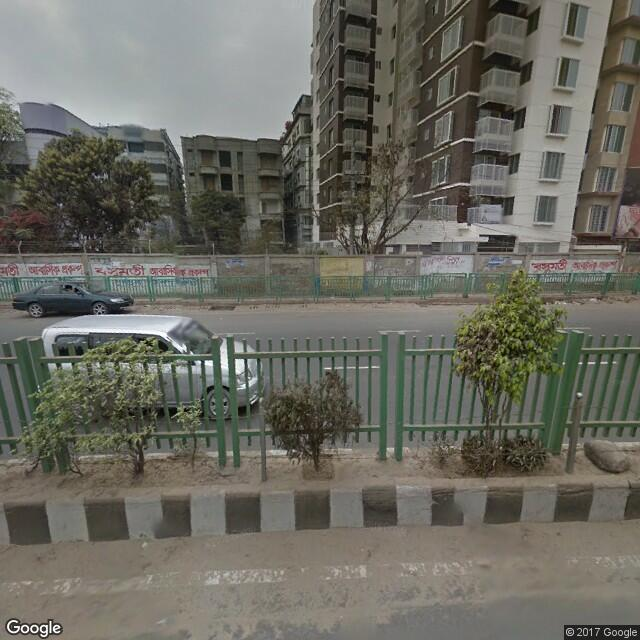

In [15]:
#from ipywidgets import Image
from IPython.display import Image
from IPython.display import display

imgs = ['img0', 'img90', 'img180', 'img270']
images = []
for row in df[imgs].itertuples(index=False):
    for i in xrange(len(imgs)):
        img = Image(data=b64decode(row[i]), width="640px")
        images.append(img)

display(*images[:10*4])

## Subplot

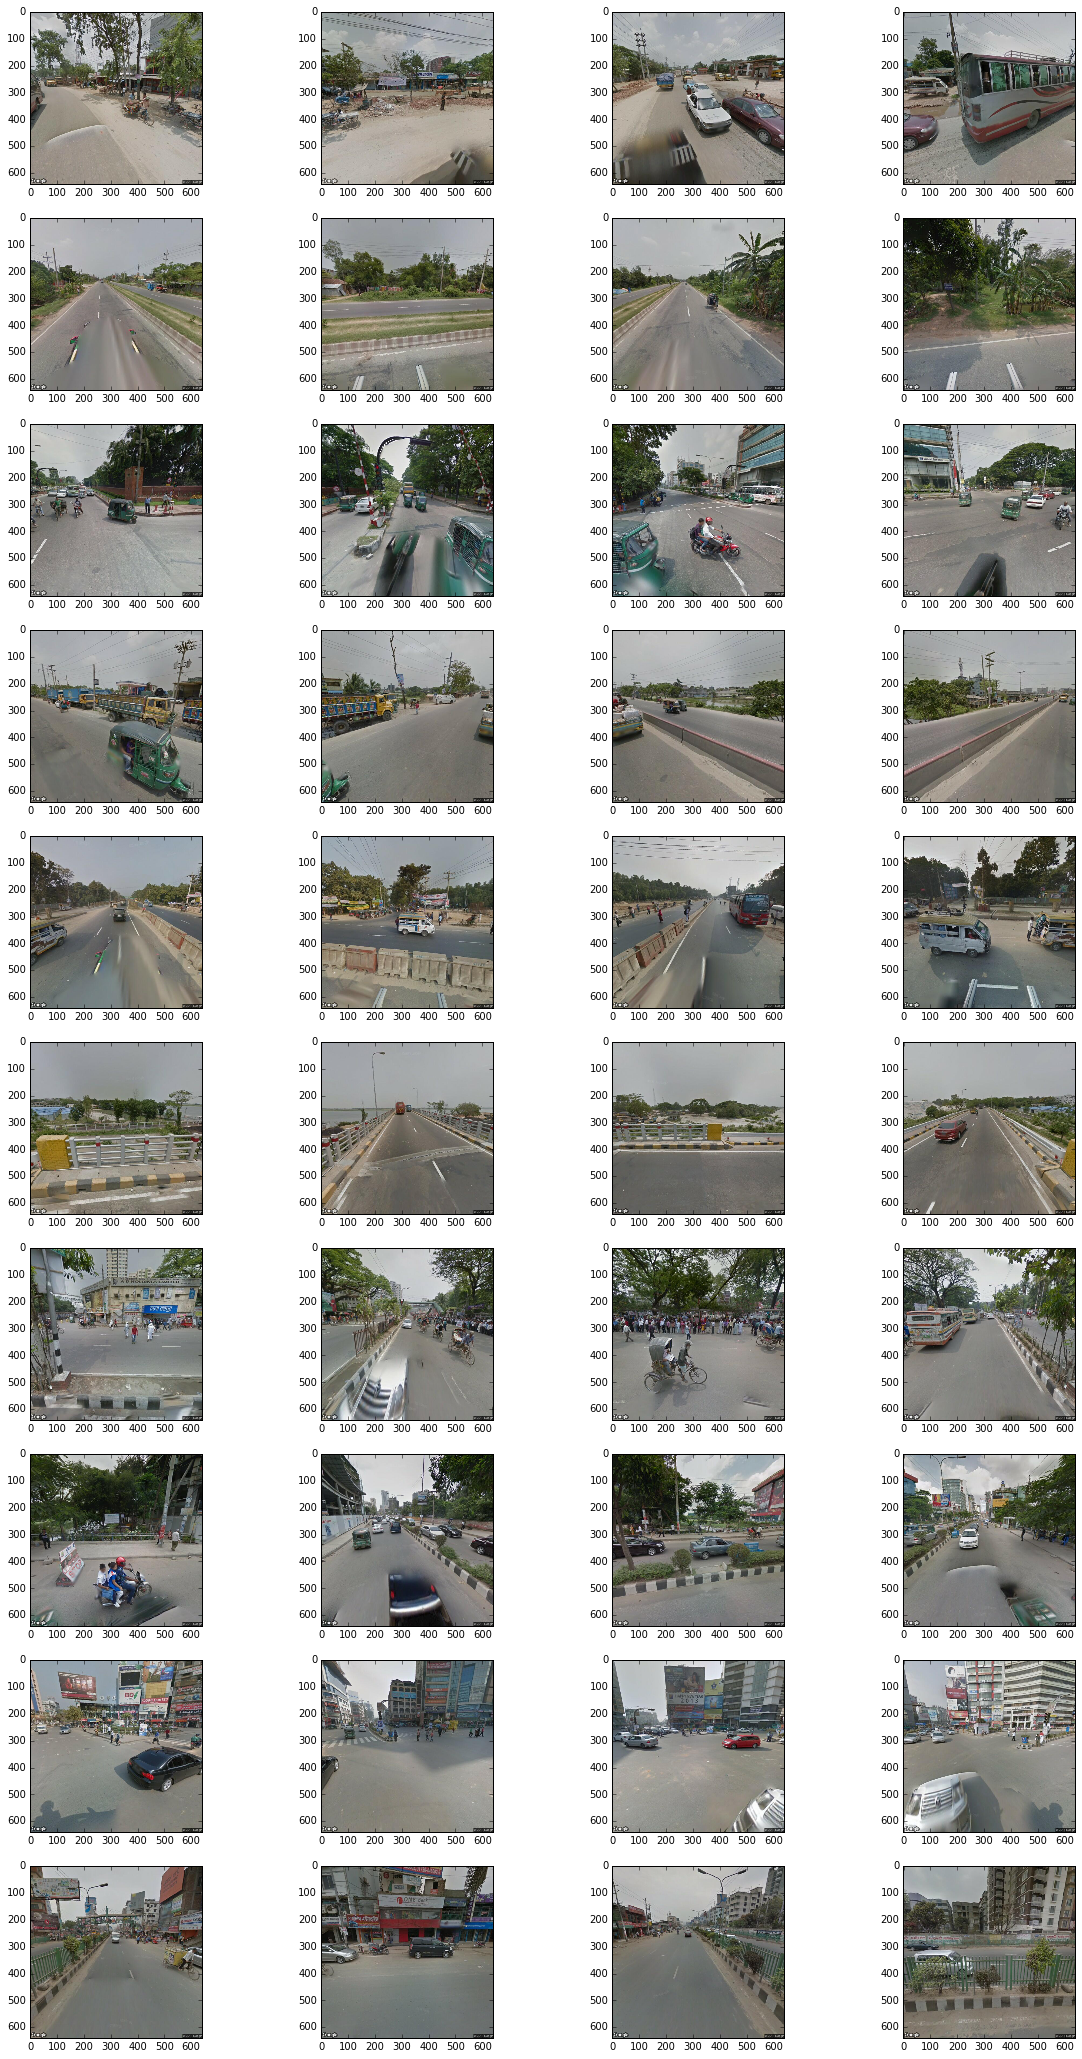

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image as PILImage
from cStringIO import StringIO

plotimages = images[:4*10]
plt.figure(figsize=(20, 40))
columns = 4
for i, image in enumerate(plotimages):
    plt.subplot(len(plotimages) / columns + 1, columns, i + 1)
    img = PILImage.open(StringIO(image.data))
    plt.imshow(img)


## Export Data for Mturk

In [17]:
df.to_csv('{0:s}-roads-gsv.csv.gz'.format(city), index_label='id', encoding='utf-8', compression='gzip')

In [18]:
def export_image_to_file(i, data, basename):
    url = '{0:s}{1:04d}.jpg'.format(basename, i)
    with open('mturk/' + url, 'wb') as f:
        raw = b64decode(data)
        f.write(raw)
    return url

In [19]:
rdf = pd.read_csv('{0:s}-roads-gsv.csv.gz'.format(city))

In [20]:
rdf['url_img0'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img0, '{0:s}/img0_'.format(city)), axis=1)
rdf['url_img90'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img90, '{0:s}/img90_'.format(city)), axis=1)
rdf['url_img180'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img180, '{0:s}/img180_'.format(city)), axis=1)
rdf['url_img270'] = rdf.apply(lambda r: export_image_to_file(r.id, r.img270, '{0:s}/img270_'.format(city)), axis=1)

In [21]:
del rdf['img0']
del rdf['img90']
del rdf['img180']
del rdf['img270']
rdf.to_csv('mturk/{0:s}.csv'.format(city), index=False)